# Tabular models

In [1]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [3]:
path = "C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/fastai_lesson4tabular/"



In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/X_train.csv", header = 0)
test = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/X_test.csv", header = 0)
y = pd.read_csv("C:/Users/vince/OneDrive/Bureau/projet/generali claim prediction/y_train_saegPGl.csv", header = 0)

In [5]:


## identifying num and cat cols

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html
# values in Expo are miswiritten and we have so convert "," to "." to avoid error
import re
df['EXPO'] = df['EXPO'].str.replace(',', '.', regex = True)
test['EXPO'] = test['EXPO'].str.replace(',', '.', regex = True)

#we set the datype as float32
df['EXPO']  = df['EXPO'].astype('float32')
test['EXPO'] = test['EXPO'].astype('float32')

df = df.drop(["Unnamed: 0"], axis = 1)
y = y.drop(["Unnamed: 0"], axis = 1)

df["claims"]= y["target"]

df.Insee = pd.to_numeric(df.Insee, errors = "coerce")

In [7]:
#option2
# we set the data types for most of the columns taht are categorical
dep_var = "claims"
cat_names = ['ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_24_categ', "ft_23_categ"]

cont_names =["ft_2_categ","EXPO", "superficief",'ft_4_categ',"ft_21_categ","ft_22_categ","Insee"]
procs = [FillMissing, Categorify, Normalize]

In [8]:
#option2
test = TabularList.from_df(df.iloc[8000:10000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [ ]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [9]:
#option 2
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(8000,10000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [10]:
data.show_batch(rows=10)

ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,ft_24_categ,ft_23_categ,superficief_na,ft_22_categ_na,Insee_na,ft_2_categ,EXPO,superficief,ft_4_categ,ft_21_categ,ft_22_categ,Insee,target
V,N,1,O,1,O,N,O,O,O,AUTRE,IDENTIQUE,V,pi,2,5,0.6,False,False,False,0.2571,0.3688,-0.3127,1.5949,0.7940,-1.1167,0.6027,0
N,V,V,V,V,V,V,V,V,V,V,V,N,base,2,.,0.0,False,False,False,0.9832,-0.9370,-0.3921,1.5949,1.8334,0.4581,-1.4602,0
V,N,1,O,1,O,N,N,N,N,AUTRE,IDENTIQUE,V,pi,1,2,0.0,False,False,False,0.9832,-1.9958,-0.7166,-0.6269,-0.2454,0.7101,1.1245,0
N,V,V,V,V,V,V,V,V,V,V,V,O,base,2,.,0.0,False,False,False,-1.1951,0.3688,-0.4204,1.5949,1.8334,0.7101,-1.4605,0
V,N,2,O,1,O,N,O,N,N,AUTRE,IDENTIQUE,V,pi,1,3,0.0,False,False,False,-1.1951,0.3688,0.3812,-0.6269,1.8334,0.1431,-1.4580,1
V,N,1,O,1,O,N,O,O,N,AUTRE,IDENTIQUE,V,base,2,4,0.0,False,False,False,1.7093,0.3571,0.8143,1.5949,-0.2454,1.4345,1.5418,1
N,V,V,V,V,V,V,V,V,V,V,V,N,base,2,.,0.0,False,False,False,1.7093,-0.7223,0.2708,-0.6269,1.8334,0.4581,-1.4606,1
V,V,V,V,V,V,V,V,V,V,V,V,N,base,2,.,0.0,False,False,False,-0.4690,0.3688,-0.2997,-0.6269,-1.2848,-0.1718,0.7891,0
N,V,V,V,V,V,V,V,V,V,V,V,N,base,2,.,0.0,False,False,False,-0.4690,0.3688,0.3058,-0.6269,-0.2454,0.7101,0.6637,1
V,N,1,O,1,O,N,N,N,N,AUTRE,IDENTIQUE,V,base,2,1,0.3,False,False,True,0.9832,0.3688,0.0913,-0.6269,0.7940,1.3715,0.1629,0


In [ ]:
#https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=[AUROC(),accuracy])

In [11]:
#option 2
learn = tabular_learner(data, layers=[500,200], metrics=[AUROC(),accuracy])

In [12]:
# select the appropriate learning rate
learn.lr_find()

epoch,train_loss,valid_loss,auroc,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


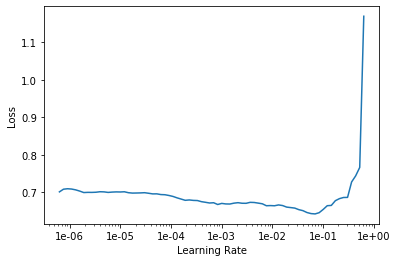

In [13]:
# we typically find the point where the slope is steepest
learn.recorder.plot()

In [14]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(10, max_lr=slice(1e-01))

epoch,train_loss,valid_loss,auroc,accuracy,time
0,0.521126,0.499406,0.693119,0.772000,01:37
1,0.506805,0.506989,0.696838,0.776500,01:45
2,0.513384,0.585961,0.687027,0.709500,01:47
3,0.498477,0.505142,0.693114,0.767500,01:40
4,0.507143,2.350722,0.637693,0.520500,01:37
5,0.495029,3.053718,0.696590,0.773500,01:40
6,0.487808,201.650467,0.685923,0.770500,01:43
7,0.479014,9.983141,0.700745,0.770000,01:51
8,0.477369,47.005466,0.703810,0.778000,01:33
9,0.468428,38.294857,0.703844,0.775000,01:28


In [15]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,auroc,accuracy,time
0,0.469831,15.169712,0.696749,0.778500,01:23
1,0.475933,12.877028,0.699056,0.770000,01:57
2,0.480754,13.474933,0.692540,0.774500,02:06
3,0.469102,18.414772,0.692688,0.770000,02:10
4,0.476140,2.877413,0.705998,0.779000,01:14


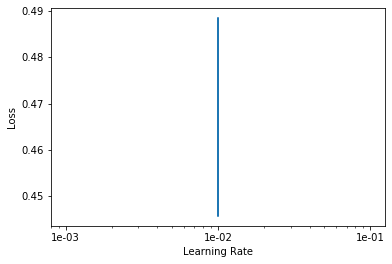

In [16]:
learn.recorder.plot()

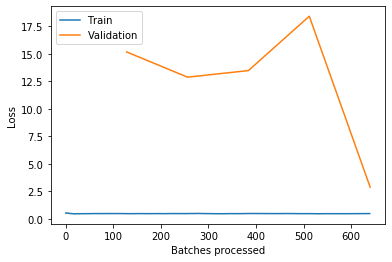

In [17]:
# Analyse our model
learn.model
learn.recorder.plot_losses()

In [19]:
learn.fit_one_cycle(5, 1e-02, wd=0.2)

epoch,train_loss,valid_loss,auroc,accuracy,time
0,0.475909,2.590150,0.700443,0.780500,01:28
1,0.472374,1.327238,0.697660,0.775500,01:42
2,0.476892,0.752700,0.699365,0.780000,01:19
3,0.473493,0.787804,0.694426,0.776000,00:54
4,0.468452,1.013561,0.695766,0.775500,00:52


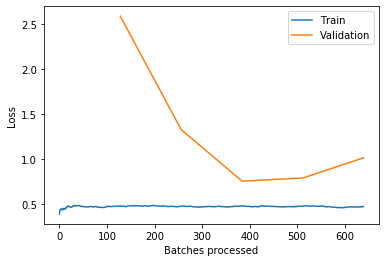

In [20]:
# Analyse our model
learn.model
learn.recorder.plot_losses()

In [21]:
# Predict our target value
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [ ]:
learn.fit(1, 1e-2)

## Inference

In [22]:
row = df.iloc[0]

In [23]:
learn.predict(row)

(Category tensor(0), tensor(0), tensor([0.8303, 0.1697]))

# removing all the categorical variables

In [24]:
df1 = df.drop(['ft_4_categ','ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ', 'ft_23_categ', 'ft_24_categ'], axis= 1)


In [25]:
df1

,Identifiant,ft_2_categ,EXPO,superficief,ft_22_categ,Insee,claims
0,18702,2014,1.000000,1351.0,2012.0,65440.0,0
1,3877,2014,1.000000,1972.0,1980.0,14341.0,1
2,4942,2013,1.000000,1630.0,NaN,75109.0,0
3,13428,2013,0.246575,532.0,NaN,92004.0,0
4,17137,2015,1.000000,1050.0,1972.0,59340.0,0
...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,550.0,1960.0,76217.0,0
10225,16868,2014,0.000000,5580.0,2008.0,78073.0,0
10226,8499,2015,0.246575,750.0,NaN,6029.0,0
10227,5319,2015,1.000000,1754.0,1960.0,64445.0,0


In [ ]:
learn??

In [26]:
#tenetative de couper les ariables inutiles
# we set the data types for most of the columns taht are categorical
dep_var = "claims"

cont_names =["Identifiant","ft_2_categ","EXPO","superficief","ft_22_categ", "Insee"]
procs = [FillMissing, Categorify, Normalize]

In [27]:
test = TabularList.from_df(df1.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [28]:
data = (TabularList.from_df(df1, path=path, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [29]:
learn = tabular_learner(data, layers=[200,100], metrics=[AUROC(),accuracy])

In [30]:
# select the appropriate learning rate
learn.lr_find()

epoch,train_loss,valid_loss,auroc,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


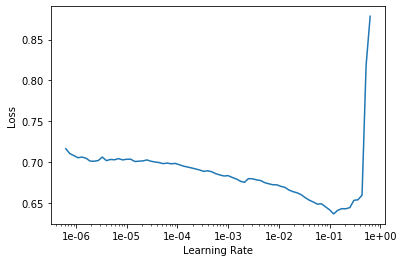

In [31]:
# we typically find the point where the slope is steepest
learn.recorder.plot()

In [32]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(7, max_lr=slice(1e-02))

epoch,train_loss,valid_loss,auroc,accuracy,time
0,0.539010,0.499097,0.703936,0.780000,00:38
1,0.492064,0.496080,0.706856,0.770000,00:45
2,0.494633,0.497685,0.718815,0.770000,00:46
3,0.498107,0.473119,0.721318,0.795000,00:45
4,0.489783,0.471378,0.725629,0.795000,00:45
5,0.487652,0.472252,0.733278,0.785000,00:47
6,0.479922,0.470489,0.731053,0.785000,00:47


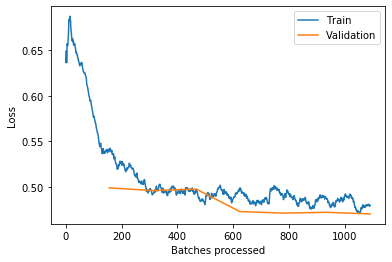

In [33]:
# Analyse our model
learn.model
learn.recorder.plot_losses()